# 1. Import libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# combinations
from itertools import combinations

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

In [11]:
dataset = pd.read_csv('../results/prepared_data.csv')

# set the column type for column with date
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y-%m-%d')

dataset

,Data,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],BRZEG DOLNY (151160170) Stan wody [cm],...,RUDNA (251160140) Brak pomiaru,STARE OLESNO (250180030) Brak pomiaru,SUKOWICE (250180330) Brak pomiaru,SZALEJÓW GÓRNY (250160840) Brak pomiaru,SZCZAWNO-ZDRÓJ (250160130) Brak pomiaru,TWARDOCICE (251150280) Brak pomiaru,WALIM (250160270) Brak pomiaru,ZIELINA (250170280) Brak pomiaru,ŁABĘDY (250180330) Brak pomiaru,ŁANY (251170420) Brak pomiaru
0,2017-11-01,100.0,57.0,291.0,91.0,64.0,153.0,167.0,251.0,286.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2017-11-02,95.0,55.0,285.0,89.0,64.0,145.0,167.0,239.0,285.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-11-03,93.0,54.0,290.0,87.0,65.0,139.0,170.0,224.0,258.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2017-11-04,90.0,55.0,296.0,86.0,63.0,136.0,163.0,226.0,218.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2017-11-05,88.0,53.0,291.0,86.0,62.0,133.0,160.0,215.0,244.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,67.0,50.0,219.0,71.0,55.0,86.0,161.0,175.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2021-10-28,67.0,50.0,221.0,71.0,57.0,86.0,161.0,170.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,2021-10-29,67.0,50.0,219.0,71.0,54.0,85.0,161.0,170.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,2021-10-30,66.0,52.0,215.0,70.0,55.0,86.0,161.0,169.0,316.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Columns: 174 entries, Data to ŁANY (251170420) Brak pomiaru
dtypes: datetime64[ns](1), float64(173)
memory usage: 1.9 MB


In [4]:
hierarchy = pd.read_csv('../results/prepared_hierarchy.csv')

hierarchy

,id_meteo,name_meteo,id_hydro,name_hydro,the_same_location
0,251160360,GŁOGÓW,151160060,GŁOGÓW,1
1,249180550,CIESZYN,149180060,CIESZYN,1
2,249180550,CIESZYN,149180070,CIESZYN,1
3,249180550,CIESZYN,149180030,ŁAZISKA,0
4,249180550,CIESZYN,149180020,CHAŁUPKI,0
...,...,...,...,...,...
84,250160650,MIĘDZYLESIE,150160190,MIĘDZYLESIE,1
85,250160520,LĄDEK-ZDRÓJ,150160230,LĄDEK-ZDRÓJ,1
86,350160520,KŁODZKO,150160110,SZALEJÓW DOLNY,0
87,250160840,SZALEJÓW GÓRNY,150160080,TŁUMACZÓW,0


In [6]:
water_level_suffix = 'Stan wody [cm]'
rains_suffix = 'Suma opadów [mm]'

# 3. EDA

In [7]:
def create_col_name(station_id, station_name, suffix):
    name = f'{station_name} ({station_id}) {suffix}'
    return name

River level over time for different stations.

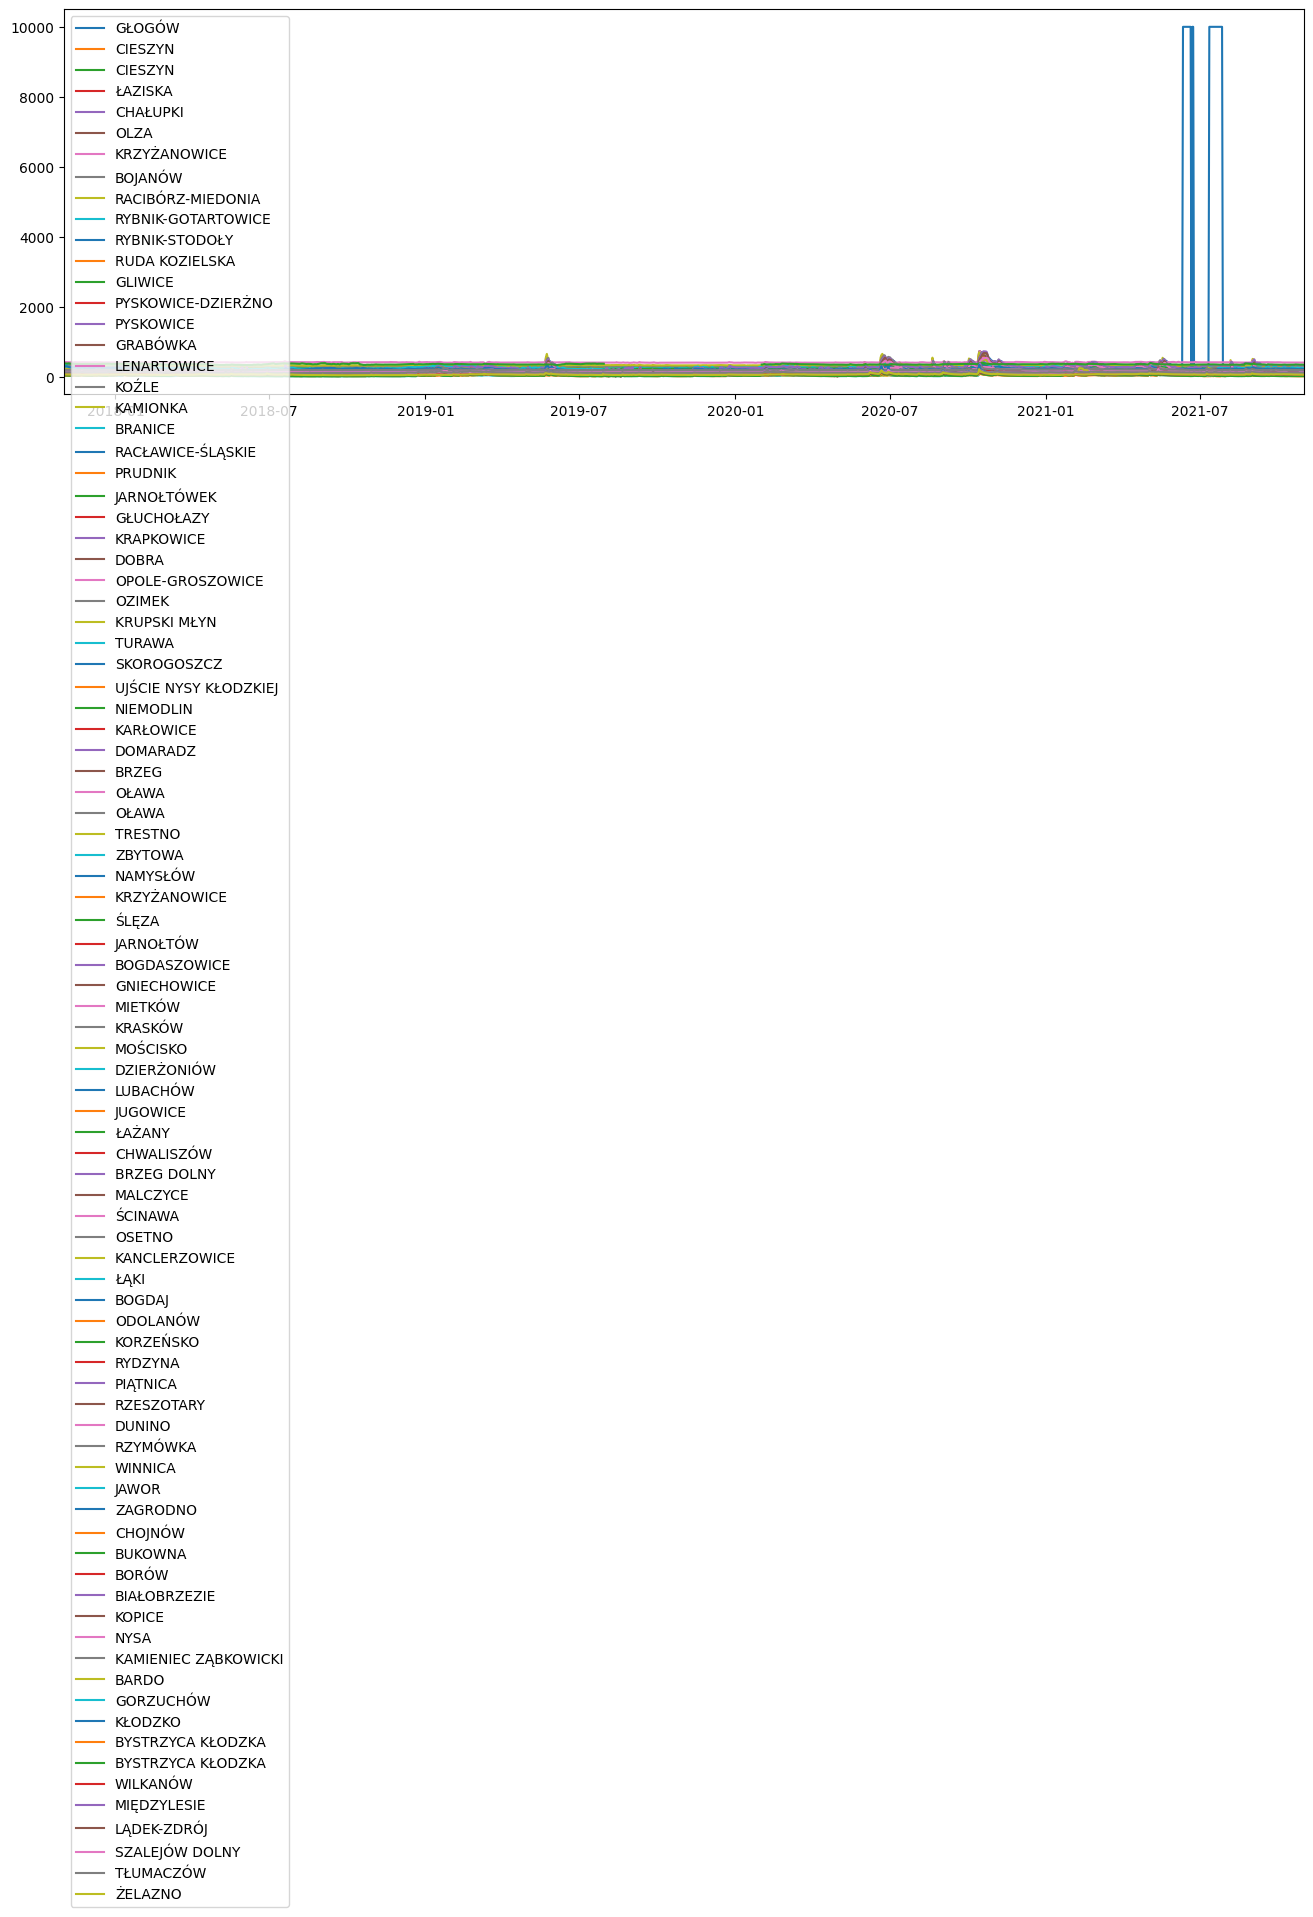

In [8]:
plt.figure(figsize=(16, 5))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], dataset[water_level_col], label=stations["name_hydro"])

    
# decorations
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left')
plt.show()

River level over time for different stations. ~ Normalized by MinMaxScaler

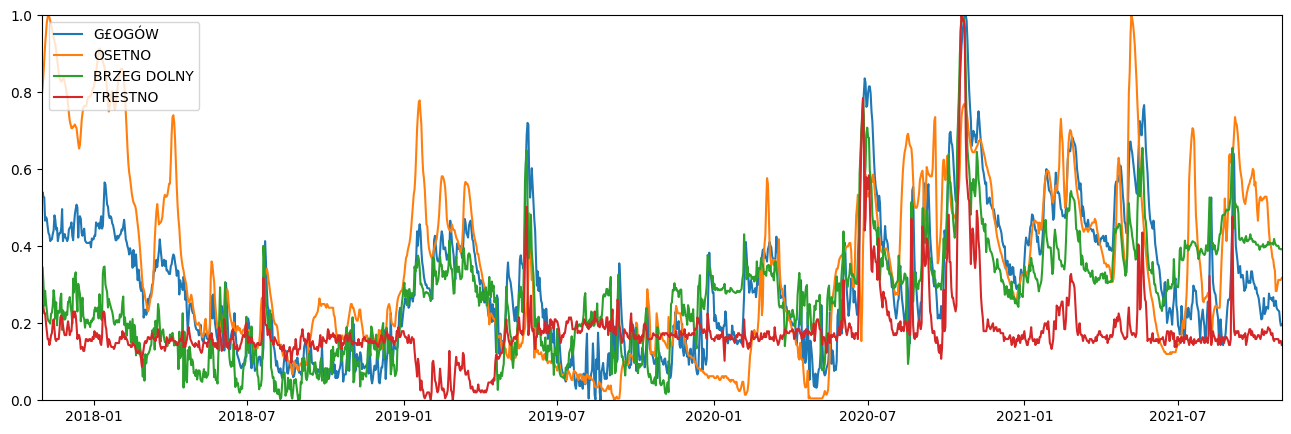

In [24]:
plt.figure(figsize=(16, 5))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], 
             (dataset[water_level_col] - dataset[water_level_col].min())/\
             (dataset[water_level_col].max() - dataset[water_level_col].min()), 
             label=stations["name_hydro"])

    
# decorations
plt.ylim([0, 1])
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left')
plt.show()

River level over time with sum of rain for this station.

In [8]:
hierarchy

,id_hydro,name_hydro,id_meteo,name_meteo
0,151160060,G£OGÓW,0,no_info
1,151160140,OSETNO,251160110,OSETNO
2,151160170,BRZEG DOLNY,251160230,BRZEG DOLNY
3,151170030,TRESTNO,251170420,£ANY


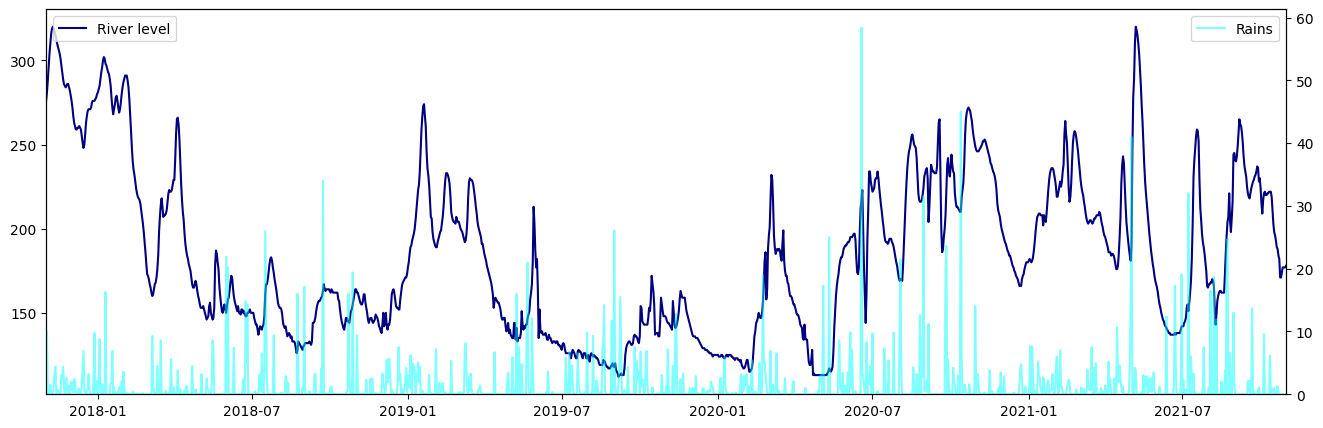

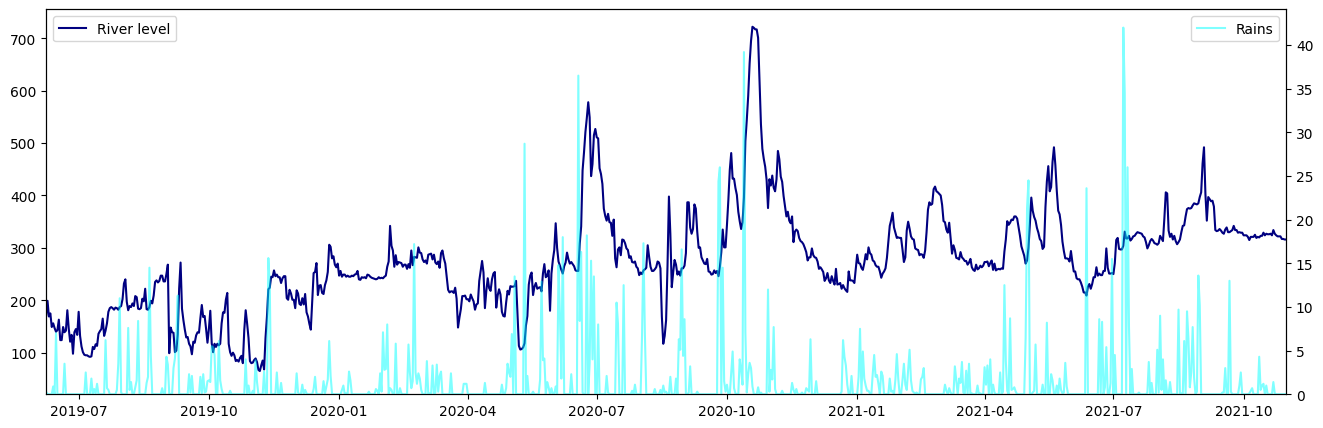

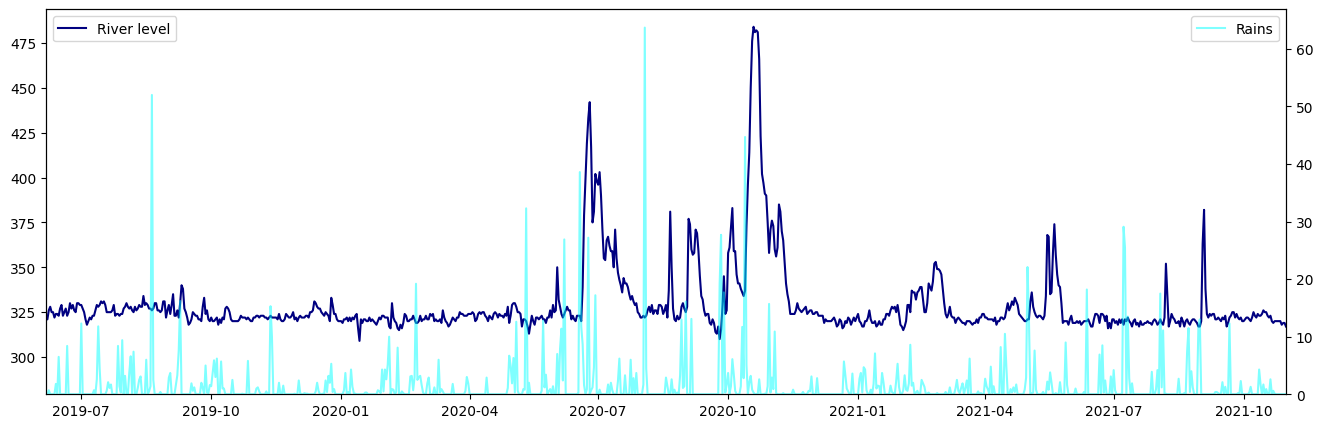

In [9]:
for _, stations in hierarchy.iterrows():
    if stations['id_meteo']!=0:
        fig, ax = plt.subplots(1, 1, figsize=(16, 5))
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
        
        ax.plot(dataset['Data'], dataset[water_level_col], label='River level', color='navy')

        ax2 = ax.twinx()
        ax2.plot(dataset['Data'], dataset[rain_col], label='Rains', color='aqua', linewidth=1.5, alpha=0.5)


        # decorations
        ax.set_xlim([dataset.loc[~(pd.isnull(dataset[rain_col])), 'Data'].min(), dataset['Data'].max()])
        ax.legend(loc='upper left')
        
        ax2.legend(loc='upper right')
        ax2.set_ylim([0, dataset[rain_col].max()*1.05])
        
        plt.show()

How the river level changes in the following years.

In [10]:
dataset_years_monthly = dataset.copy()
dataset_years_monthly['Rok'] = dataset_years_monthly['Data'].dt.year
dataset_years_monthly['Miesiąc'] = [d.strftime('%b') for d in dataset_years_monthly['Data']]

dataset_years_monthly = dataset_years_monthly.drop(['Data'] + list(dataset_years_monthly.filter(regex=('Brak pomiaru')).columns),
                                                   axis=1)
dataset_years_monthly = dataset_years_monthly.groupby(['Rok', 'Miesiąc']).mean()
dataset_years_monthly.reset_index(inplace=True)


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dataset_years_monthly['Miesiąc'] = pd.Categorical(dataset_years_monthly['Miesiąc'], categories=months, ordered=True)
dataset_years_monthly.sort_values(by=['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly.reset_index(drop=True, inplace=True)

dataset_years_monthly.head(3)

,Rok,Miesiąc,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm]
0,2017,Nov,215.966667,320.100000,297.966667,325.433333,NaN,1.423333,NaN
1,2017,Dec,214.483871,314.322581,265.806452,322.322581,NaN,1.464516,NaN
2,2018,Jan,216.419355,324.612903,284.290323,320.774194,NaN,1.674194,NaN


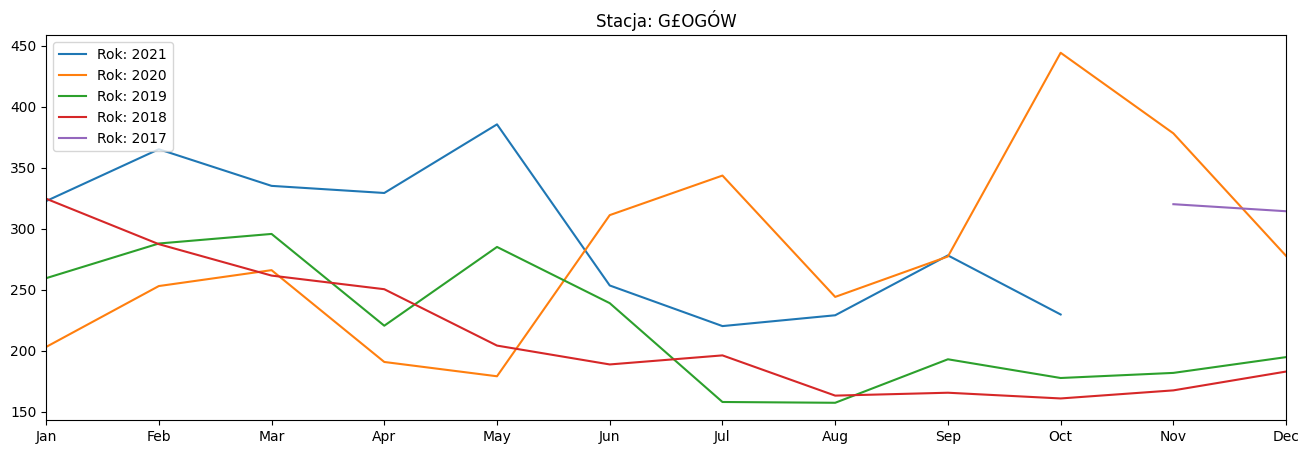

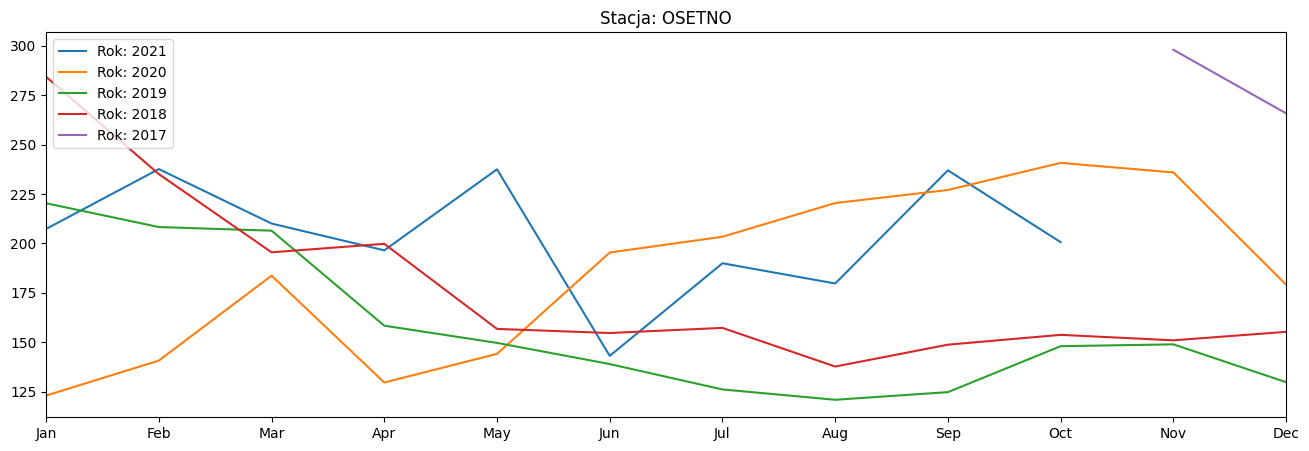

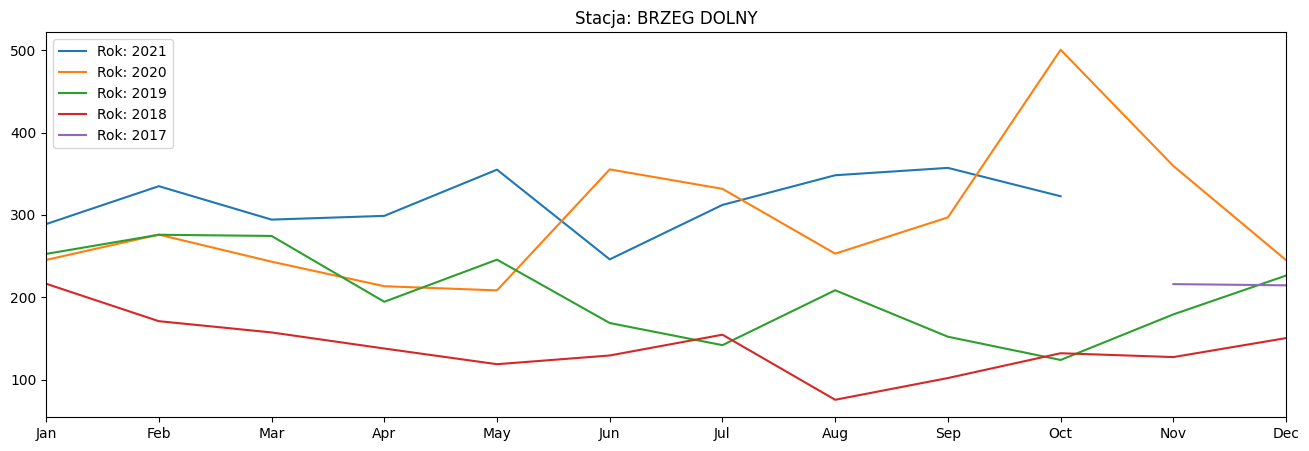

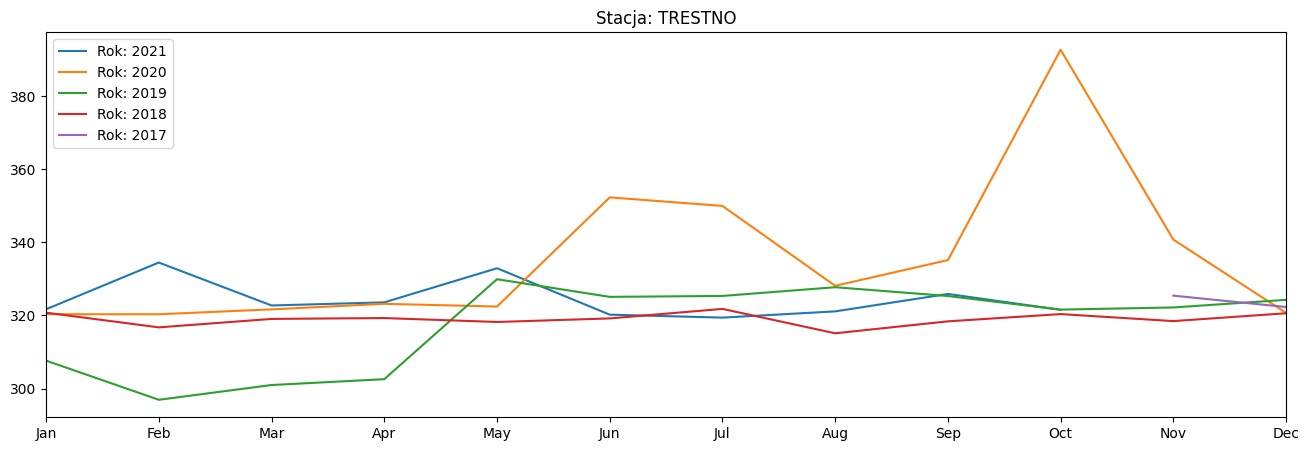

In [11]:
for _, stations in hierarchy.iterrows():
    plt.figure(figsize=(16, 5))
    
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    for year in dataset_years_monthly['Rok'].unique()[::-1]:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        plt.plot(dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, 'Miesiąc'], 
                 dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, water_level_col], label=f'Rok: {year}')
    
# decorations
    plt.title(f'Stacja: {stations["name_hydro"]}')
    plt.xlim(['Jan', 'Dec'])
    plt.legend(loc='upper left')
    plt.show()

Effect of average rain on average normalized river level

In [12]:
dataset_years_monthly_normalized = dataset_years_monthly.copy()

# Level of water
for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    dataset_years_monthly_normalized[water_level_col] = \
        (dataset_years_monthly_normalized[water_level_col] - dataset_years_monthly_normalized[water_level_col].min())/\
        (dataset_years_monthly_normalized[water_level_col].max() - dataset_years_monthly_normalized[water_level_col].min())
    
# Rain
rain_cols = dataset_years_monthly_normalized.filter(regex=("Suma opadów")).columns
dataset_years_monthly_normalized[rain_cols] = \
        (dataset_years_monthly_normalized[rain_cols] - dataset_years_monthly_normalized[rain_cols].min().min())/\
        (dataset_years_monthly_normalized[rain_cols].max().max() - dataset_years_monthly_normalized[rain_cols].min().min())

dataset_years_monthly_normalized.tail(3)

,Rok,Miesiąc,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm]
45,2021,Aug,0.641518,0.250028,0.332242,0.252579,0.511969,0.763513,0.486872
46,2021,Sep,0.662550,0.421070,0.655553,0.302374,0.105023,0.109848,0.100801
47,2021,Oct,0.581480,0.252276,0.450340,0.256956,0.045648,0.106346,0.061990


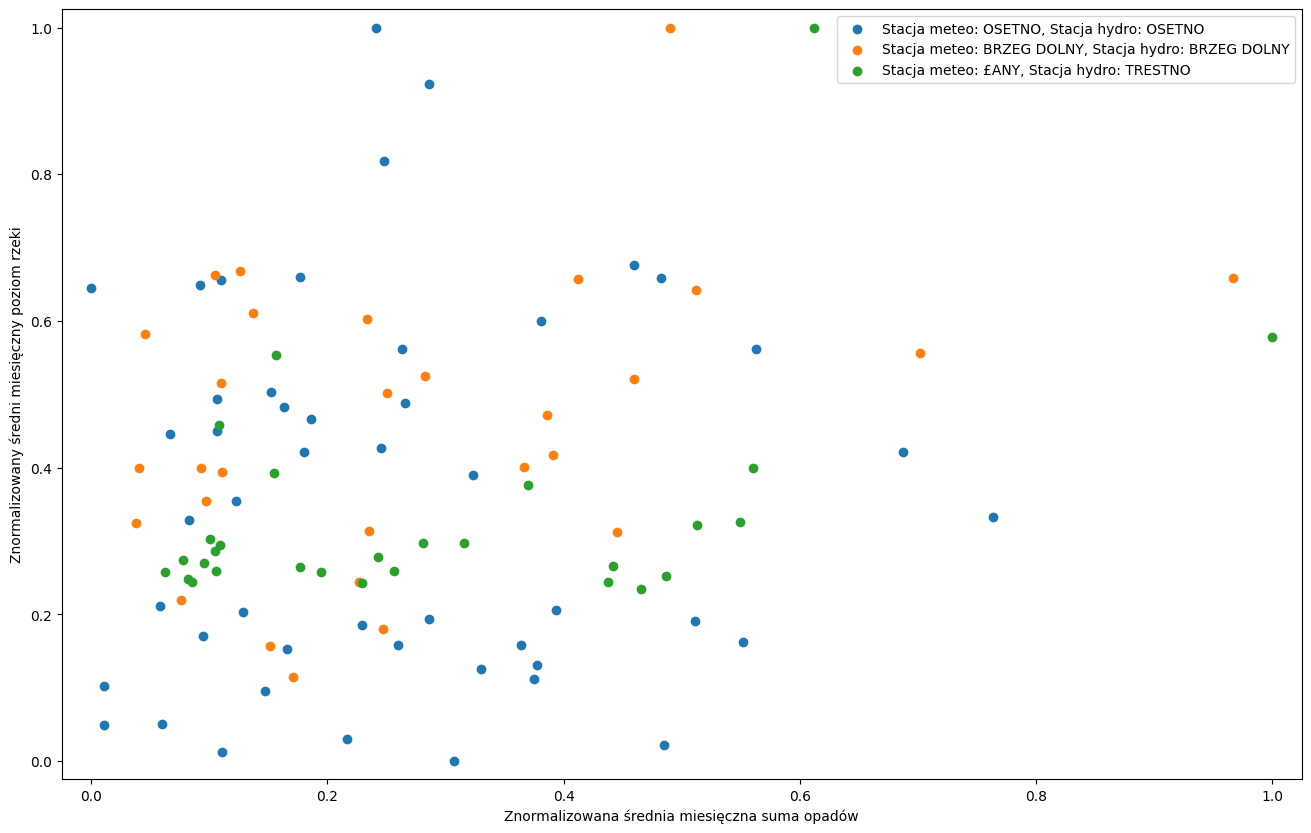

In [13]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    if stations['id_meteo']!=0:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)

        plt.scatter(dataset_years_monthly_normalized[rain_col], dataset_years_monthly_normalized[water_level_col],
                    label=f'Stacja meteo: {stations["name_meteo"]}, Stacja hydro: {stations["name_hydro"]}')

    
# decorations
plt.ylim([-0.025, 1.025])
plt.xlim([-0.025, 1.025])
plt.xlabel('Znormalizowana średnia miesięczna suma opadów')
plt.ylabel('Znormalizowany średni miesięczny poziom rzeki')
plt.legend(loc='upper right')
plt.show()

Sezonowość / Trend

In [14]:
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized.copy()
dataset_years_monthly_normalized_combined.set_index(['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined[
                                                        dataset_years_monthly_normalized.filter(regex=("Stan wody")).columns]
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined.stack().to_frame()
dataset_years_monthly_normalized_combined.rename({0: 'Średni stan wody'}, axis=1, inplace=True)
dataset_years_monthly_normalized_combined.reset_index(inplace=True)

dataset_years_monthly_normalized_combined

,Rok,Miesiąc,level_2,Średni stan wody
0,2017,Nov,BRZEG DOLNY (151160170) Stan wody [cm],0.330472
1,2017,Nov,G£OGÓW (151160060) Stan wody [cm],0.567378
2,2017,Nov,OSETNO (151160140) Stan wody [cm],1.000000
3,2017,Nov,TRESTNO (151170030) Stan wody [cm],0.297503
4,2017,Dec,BRZEG DOLNY (151160170) Stan wody [cm],0.326983
...,...,...,...,...
187,2021,Sep,TRESTNO (151170030) Stan wody [cm],0.302374
188,2021,Oct,BRZEG DOLNY (151160170) Stan wody [cm],0.581480
189,2021,Oct,G£OGÓW (151160060) Stan wody [cm],0.252276
190,2021,Oct,OSETNO (151160140) Stan wody [cm],0.450340


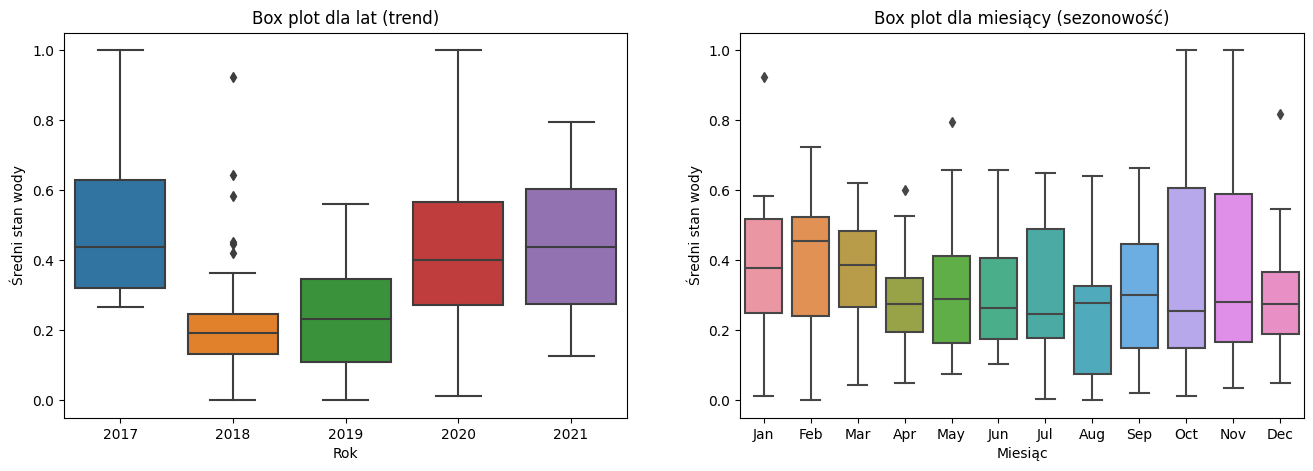

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)

sns.boxplot(x='Rok', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[0]).set(
    xlabel='Rok', 
    ylabel='Średni stan wody'
)
axes[0].set_title('Box plot dla lat (trend)')

sns.boxplot(x='Miesiąc', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[1]).set(
    xlabel='Miesiąc', 
    ylabel='Średni stan wody'
)
axes[1].set_title('Box plot dla miesiący (sezonowość)')

plt.show()

#### Cross-correlation ~ river levels at different stations

In [16]:
dataset_normalized = dataset.copy()

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
    
    # Level of water
    dataset_normalized[water_level_col] = \
        (dataset_normalized[water_level_col] - dataset_normalized[water_level_col].min())/\
        (dataset_normalized[water_level_col].max() - dataset_normalized[water_level_col].min())
    if stations['id_meteo']!=0:
        # Rain
        dataset_normalized[rain_col] = \
            (dataset_normalized[rain_col] - dataset_normalized[rain_col].min())/\
            (dataset_normalized[rain_col].max() - dataset_normalized[rain_col].min())

dataset_normalized

,Data,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm],BRZEG DOLNY (251160230) Brak pomiaru,OSETNO (251160110) Brak pomiaru,£ANY (251170420) Brak pomiaru
0,2017-11-01,0.347305,0.531178,0.788462,0.230769,NaN,0.011986,NaN,0.0,0.0,0.0
1,2017-11-02,0.345808,0.540416,0.812500,0.246154,NaN,0.171233,NaN,0.0,0.0,0.0
2,2017-11-03,0.305389,0.528868,0.846154,0.241026,NaN,0.001712,NaN,0.0,0.0,0.0
3,2017-11-04,0.245509,0.526559,0.884615,0.225641,NaN,0.000000,NaN,0.0,0.0,0.0
4,2017-11-05,0.284431,0.466513,0.923077,0.225641,NaN,0.010274,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,0.401198,0.233256,0.312500,0.158974,0.0,0.000000,0.0,0.0,0.0,0.0
1457,2021-10-28,0.393713,0.230947,0.312500,0.148718,0.0,0.000000,0.0,0.0,0.0,0.0
1458,2021-10-29,0.393713,0.207852,0.312500,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0
1459,2021-10-30,0.392216,0.193995,0.312500,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0


Pearson correlation

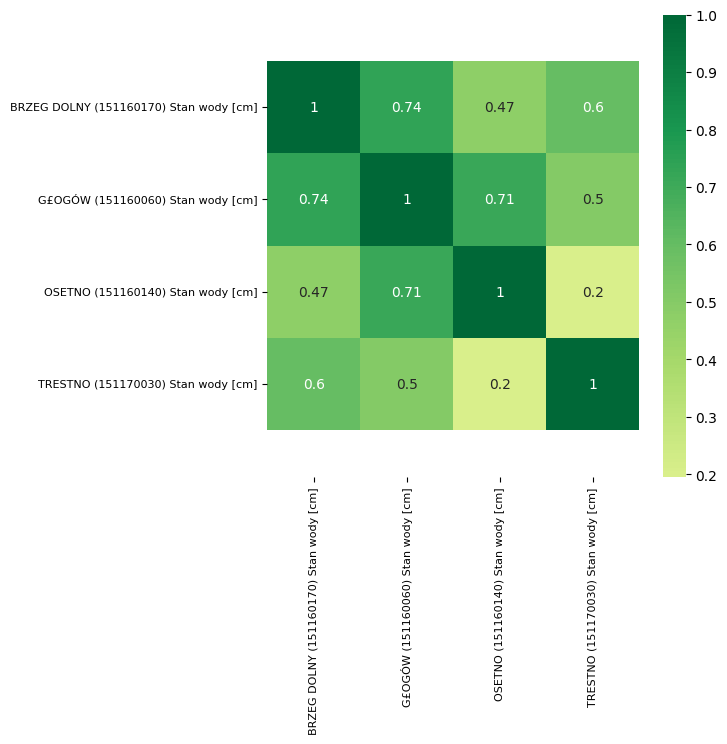

In [17]:
# Plot
plt.figure(figsize=(6, 6))
ax = sns.heatmap(dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr(), 
                 xticklabels=dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr().columns, 
                 yticklabels=dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Time Lagged Cross Correlation

In [18]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [19]:
dataset_normalized.head(3)

,Data,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm],BRZEG DOLNY (251160230) Brak pomiaru,OSETNO (251160110) Brak pomiaru,£ANY (251170420) Brak pomiaru
0,2017-11-01,0.347305,0.531178,0.788462,0.230769,NaN,0.011986,NaN,0.0,0.0,0.0
1,2017-11-02,0.345808,0.540416,0.812500,0.246154,NaN,0.171233,NaN,0.0,0.0,0.0
2,2017-11-03,0.305389,0.528868,0.846154,0.241026,NaN,0.001712,NaN,0.0,0.0,0.0


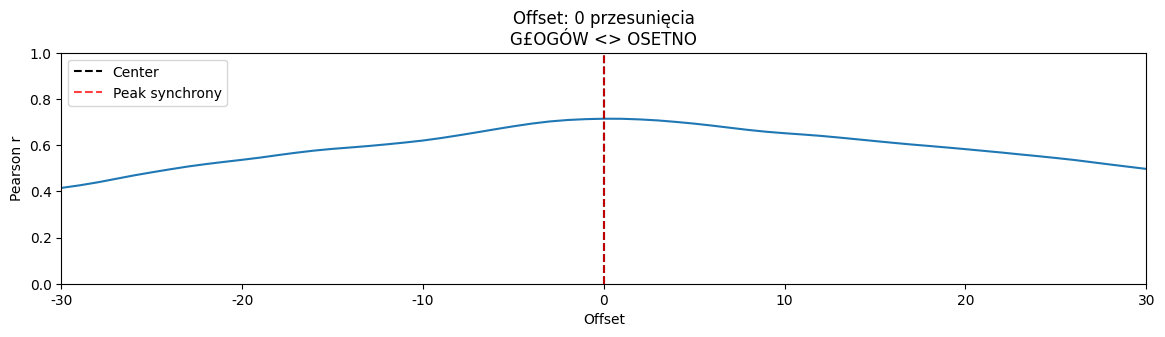

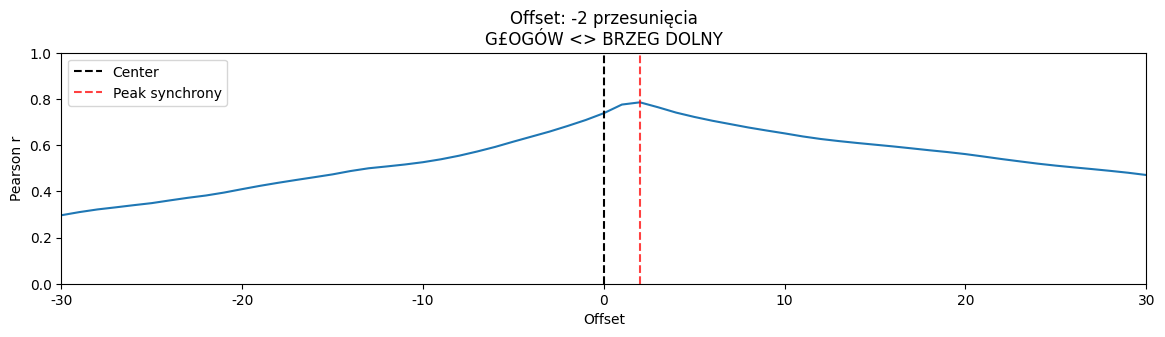

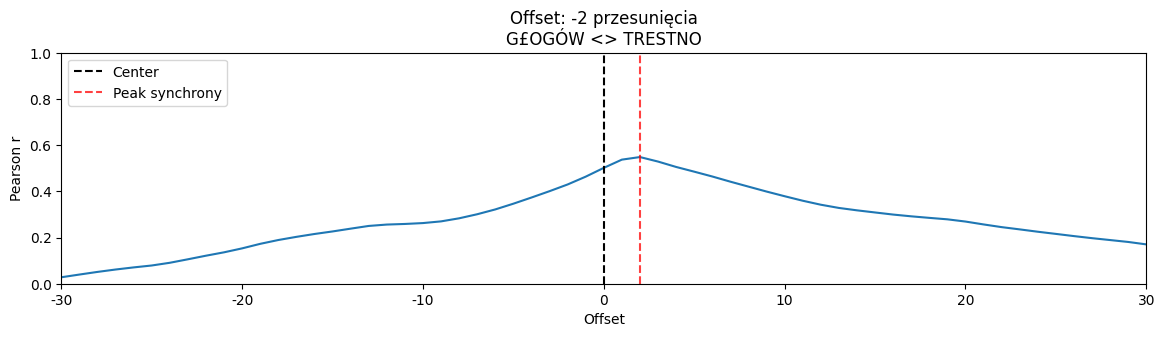

In [39]:
time_lagged_cross_correlation_to_show = 3

time_lagged_cross_correlation = pd.DataFrame({'pierwsza_stacja': [], 'druga_stacja': [], 'lag': [], 
                                              'corr': [], 'arg_corr': [], 'max_corr': []})

hydro_stations = list(hierarchy.index)

for i, (first_station, second_station) in enumerate(combinations(hydro_stations, 2)):
    first_water_level_col = create_col_name(hierarchy.loc[first_station, "id_hydro"], 
                                            hierarchy.loc[first_station, "name_hydro"],
                                            water_level_suffix)
    first_station_name = hierarchy.loc[first_station, "name_hydro"]
    second_water_level_col = create_col_name(hierarchy.loc[second_station, "id_hydro"], 
                                             hierarchy.loc[second_station, "name_hydro"],
                                             water_level_suffix)
    second_station_name = hierarchy.loc[second_station, "name_hydro"]
    d1 = dataset_normalized[first_water_level_col].copy()
    d2 = dataset_normalized[second_water_level_col].copy()
    rs = [crosscorr(d1, d2, lag) for lag in range(-int(30),int(30+1))]
    offset = int(np.floor(len(rs)/2)-np.argmax(rs))
    # Attaching data to a DataFrame
    d1_d2_station = pd.DataFrame()
    d1_d2_station['lag'] = range(-int(30),int(30+1))
    d1_d2_station['pierwsza_stacja'] = first_station_name
    d1_d2_station['druga_stacja'] = second_station_name
    d1_d2_station['corr'] = rs
    d1_d2_station['arg_corr'] = offset
    d1_d2_station['max_corr'] = np.max(rs)
    time_lagged_cross_correlation = pd.concat([time_lagged_cross_correlation, d1_d2_station], axis=0)
    if i < time_lagged_cross_correlation_to_show:
        fig, ax=plt.subplots(figsize=(14,3))
        ax.plot(rs)
        ax.axvline(np.floor(len(rs)/2), color='k',linestyle='--', label='Center')
        ax.axvline(np.argmax(rs), color='r',linestyle='--', label='Peak synchrony', alpha=0.75)
        ax.set(title=f'Offset: {offset} przesunięcia\n{first_station_name} <> {second_station_name}',
               xlabel='Offset',ylabel='Pearson r')
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
        ax.set_xlim([0, 60])
        ax.set_ylim([0, 1])
        ax.set_xticklabels([-30, -20, -10, 0, 10, 20, 30])

        plt.legend(loc='upper left')
        plt.show()

In [62]:
time_lagged_cross_correlation_glogow = time_lagged_cross_correlation.copy()
time_lagged_cross_correlation_glogow = time_lagged_cross_correlation_glogow.loc[
    time_lagged_cross_correlation_glogow['pierwsza_stacja']=='G£OGÓW', :]

time_lagged_cross_correlation_glogow.sort_values(by=['arg_corr', 'max_corr', 'druga_stacja'], ascending=[False, True, False], 
                                                 inplace=True)
time_lagged_cross_correlation_glogow['lag'] = time_lagged_cross_correlation_glogow['lag'].astype(int)
time_lagged_cross_correlation_glogow = time_lagged_cross_correlation_glogow.pivot(index='druga_stacja', columns='lag',
                                                                                  values='corr')

time_lagged_cross_correlation_glogow

lag,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,21,22,23,24,25,26,27,28,29,30
druga_stacja,,,,,,,,,,,,,,,,,,,,,
BRZEG DOLNY,0.296372,0.310049,0.321602,0.330586,0.339983,0.348903,0.360677,0.371955,0.381901,0.394584,...,0.550661,0.539757,0.529676,0.519808,0.511222,0.503572,0.496297,0.488634,0.480382,0.47067
OSETNO,0.414703,0.425763,0.438759,0.453716,0.468674,0.482231,0.495067,0.507361,0.517914,0.527412,...,0.575240,0.567858,0.559975,0.552360,0.544333,0.535839,0.525988,0.516133,0.506495,0.49710
TRESTNO,0.027942,0.039681,0.051099,0.061462,0.070641,0.078899,0.090633,0.105745,0.121294,0.135939,...,0.256686,0.245035,0.235233,0.225081,0.215689,0.206176,0.197215,0.189033,0.180814,0.17027


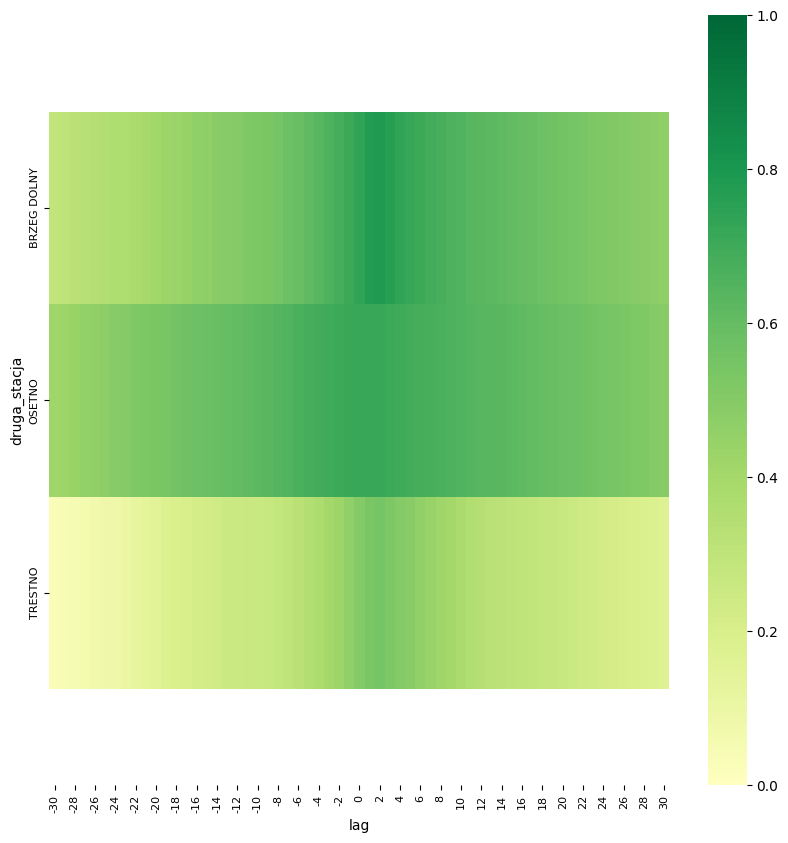

In [65]:
# Plot
plt.figure(figsize=(10, 10))
ax = sns.heatmap(time_lagged_cross_correlation_glogow, 
                 cmap='RdYlGn', 
                 center=0, vmin=0, vmax=1)

# Decorations
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Windowed Time Lagged Cross Correlations 

In [22]:
dataset_normalized

,Data,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm],BRZEG DOLNY (251160230) Brak pomiaru,OSETNO (251160110) Brak pomiaru,£ANY (251170420) Brak pomiaru
0,2017-11-01,0.347305,0.531178,0.788462,0.230769,NaN,0.011986,NaN,0.0,0.0,0.0
1,2017-11-02,0.345808,0.540416,0.812500,0.246154,NaN,0.171233,NaN,0.0,0.0,0.0
2,2017-11-03,0.305389,0.528868,0.846154,0.241026,NaN,0.001712,NaN,0.0,0.0,0.0
3,2017-11-04,0.245509,0.526559,0.884615,0.225641,NaN,0.000000,NaN,0.0,0.0,0.0
4,2017-11-05,0.284431,0.466513,0.923077,0.225641,NaN,0.010274,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,0.401198,0.233256,0.312500,0.158974,0.0,0.000000,0.0,0.0,0.0,0.0
1457,2021-10-28,0.393713,0.230947,0.312500,0.148718,0.0,0.000000,0.0,0.0,0.0,0.0
1458,2021-10-29,0.393713,0.207852,0.312500,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0
1459,2021-10-30,0.392216,0.193995,0.312500,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Windowed time lagged cross correlation
# no_splits = 20
# samples_per_split = dataset_normalized.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = df['G£OGÓW (151160060) Stan wody [cm]'].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
#     d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

Cross-correlation ~ poziomy rzeki w stacji a przeszłe opady.

Porównanie wpływu skorelowanej rzeki oraz opadów.

INNE ZMIENNE? Exploratory time series different.